## 1. Design the data structure to store attributes of agents

In [1]:
import numpy as np
import random as rnd

class agent:
    pass;

def initialize():
    global n_evol;
    global agents;

    n_evol=[n1,n2]
    agents = [];
    for i in range(n1):
        ag = agent();
        ag.type = 0;
        #ag.type = 0;
        ag.x = random();
        ag.y = random();
        agents.append(ag);
        
    for i in range(n2):
        ag = agent();
        ag.type = 1;
        #ag.type = 0;
        ag.x = random();
        ag.y = random();
        agents.append(ag);
        

## 2. Desgin the data structure to store the states of the environment

## 3. Describe the rules for how the environment behaves on its own

## 4. Describe the rules for how the agents interact with the environment

## 5. Describe the rules for how the agents behaves on its own

In [2]:
def observe():
    global agents;
    cla();
    black = [ag for ag in agents if ag.type==0];
    blue = [ag for ag in agents if ag.type==1];
    plot([ag.x for ag in blue],[ag.y for ag in blue], 'bo');
    plot([ag.x for ag in black],[ag.y for ag in black], 'ko');
    axis('image');
    axis([0,1,0,1]);
    

## 6. Describe the rules for how the agents interact with each other

In [17]:
def update():
    global agents;
    global ag;
    global n1, n2
    n= n1+n2
    ag = agents[randint(n)]
    if r_d >random():
        #if ag.type == 0:
            #n1 -=1           
        #else:
        #    n2 -=1
        agents.remove(ag)
        n1=len([agg for agg in agents if agg.type==0]);
        n2=len([agg for agg in agents if agg.type==1]);
        n_evol.append([n1,n2]);
        return
    neighbors = [nb for nb in agents if ( ((ag.x-nb.x)**2 + (ag.y-nb.y)**2)<rad**2) and (nb!=ag)];
    n_neighbors = len([nb for nb in neighbors if (nb.type == ag.type)])  #sólo se limita por los de su especie
    if (r_b > random()) and (a*n_neighbors < random()):
        agg = agent();
        agg.type = ag.type;
        agg.x = ag.x+0.1*random();
        agg.y = ag.y+0.1*random();
        agents.append(agg);
        #if ag.type == 0:
        #    n1 +=1
        #else:
        #    n2 +=1
        n1=len([agg for agg in agents if agg.type==0]);
        n2=len([agg for agg in agents if agg.type==1]);
        #n = len(agents);
    n_evol.append([n1,n2]);
            

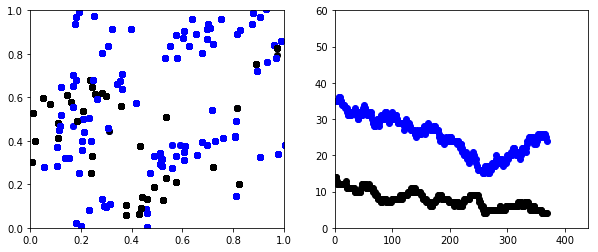

t=  368 ; n= 50 len(agents)= 28 , len(black)= 4 len(blue)= 24
n1= 3 ; n2= 24


In [ ]:
## Funciona pintando los 2 tipos (azul y negro)  y van saltando cuando v
#%matplotlib notebook
import matplotlib.pyplot as plt
from pylab import *;
#import pylab as PL
import time
from IPython import display
#%matplotlib inline
global n_evol;
global n;
global n1, n2;


n = 50; #number of agents
n1=int(0.3*n);
n2= n-n1;
rad = 1; #neighborhood radius
r_b = 0.5; # birth rate
r_d = 0.4; # death rate
a = 0.005; # limiting factor

nmax=n;

initialize();

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
blue = [ag for ag in agents if ag.type==0];
black = [ag for ag in agents if ag.type==0];
ax1.plot([ag.x for ag in blue],[ag.y for ag in blue], 'bo');
ax1.plot([ag.x for ag in black],[ag.y for ag in black], 'ko');
#axis('image');
#axis([0,1,0,1]);
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
for i in range(1000):
    update();

    blue = [ag for ag in agents if ag.type==1];
    black = [ag for ag in agents if ag.type==0];
    ax1.plot([ag.x for ag in blue],[ag.y for ag in blue], 'bo');
    ax1.plot([ag.x for ag in black],[ag.y for ag in black], 'ko');
    ni1,ni2 = n_evol[-1];
    nmax=max(nmax,ni1,ni2)
    print('n1=', n1, '; n2=', n2)
    ax2.plot(i+1,ni1,'ko',i+1,ni2,'bo')
    ax2.set_xlim([0,1.2*i])
    ax2.set_ylim([0,1.2*nmax])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print("t= ", i+1, "; n=", n, "len(agents)=",len(agents), ", len(black)=", len(black), "len(blue)=", len(blue));
    time.sleep(0.01)


In [ ]:
print(len(n_evol))
print(i)
print(n_evol[0])

In [ ]:
GUI().start(func=[initialize, observe, update])

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *;
import pylab as PL
#import ttk
matplotlib.rcParams['backend'] = 'TkAgg'

from tkinter import *
from tkinter import ttk
#from ttk import Notebook


class GUI:

    ## GUI variables
    titleText = 'PyCX Simulator'  # window title
    timeInterval = 0              # refresh time in milliseconds
    running = False
    modelFigure = None
    stepSize = 1
    currentStep = 0
    
    # Constructor
    def __init__(self, title='PyCX Simulator', interval=0, stepSize=1, parameterSetters=[]):
        self.titleText = title
        self.timeInterval = interval
        self.stepSize = stepSize
        self.parameterSetters = parameterSetters
        self.varEntries = {}
        self.statusStr = ""
               
        self.initGUI()
        
        
    # Initialization
    def initGUI(self):
        
        #create root window
        self.rootWindow = Tk()
        self.statusText = StringVar(value=self.statusStr) # at this point, statusStr = ""
        self.setStatusStr("Simulation not yet started")

        self.rootWindow.wm_title(self.titleText) # titleText = 'PyCX Simulator'
        self.rootWindow.protocol('WM_DELETE_WINDOW', self.quitGUI)
        self.rootWindow.geometry('450x300')
        self.rootWindow.columnconfigure(0, weight=1)
        self.rootWindow.rowconfigure(0, weight=1)
        
        self.notebook = ttk.Notebook(self.rootWindow)      
        # self.notebook.grid(row=0,column=0,padx=2,pady=2,sticky='nswe') # commented out by toshi on 2016-06-21(Tue) 18:30:25
        self.notebook.pack(side=TOP, padx=2, pady=2)
        
        class FirstFrame():
            def __init__(self,root):
                self.root=root
                self.frameRun=Frame(self.root) 
                self.frameSettings=Frame(self.root) 
                self.frameParameters=Frame(self.root) 
                self.frameInformation=Frame(self.root) 
                
        f2=FirstFrame(self.notebook)
        
        #self.frameRun = Frame()
        #self.frameSettings = Frame()
        #self.frameParameters = Frame()
        #self.frameInformation = Frame()          
        
        #self.notebook.add(self.frameRun,text="Run")
        #self.notebook.add(self.frameSettings,text="Settings")
        #self.notebook.add(self.frameParameters,text="Parameters")
        #self.notebook.add(self.frameInformation,text="Info")
        
        self.notebook.add(f2.frameRun, text='Run')# pass the Frame object to nb.add() 
        self.notebook.add(f2.frameSettings,text="Settings")# pass the Frame object to nb.add() 
        self.notebook.add(f2.frameParameters,text="Parameters")# pass the Frame object to nb.add() 
        self.notebook.add(f2.frameInformation,text="Info")# pass the Frame object to nb.add() 

        self.notebook.pack(expand=NO, fill=BOTH, padx=5, pady=5 ,side=TOP)
        # self.notebook.grid(row=0, column=0, padx=5, pady=5, sticky='nswe')   # commented out by toshi on 2016-06-21(Tue) 18:31:02
        
        self.status = Label(self.rootWindow, width=40,height=3, relief=SUNKEN, bd=1, textvariable=self.statusText)
        # self.status.grid(row=1,column=0,padx=5,pady=5,sticky='nswe') # commented out by toshi on 2016-06-21(Tue) 18:31:17
        self.status.pack(side=TOP, fill=X, padx=5, pady=5, expand=NO)

        # -----------------------------------
        # frameRun
        # -----------------------------------
        # buttonRun
        self.runPauseString = StringVar()
        self.runPauseString.set("Run")
        #self.buttonRun = Button(self.frameRun,width=30,height=2,textvariable=self.runPauseString,command=self.runEvent)
        self.buttonRun = Button(f2.frameRun,width=30,height=2,textvariable=self.runPauseString,command=self.runEvent)
        self.buttonRun.pack(side=TOP, padx=5, pady=5)
        self.showHelp(self.buttonRun,"Runs the simulation (or pauses the running simulation)")
        
        # buttonStep
        #self.buttonStep = Button(self.frameRun,width=30,height=2,text='Step Once',command=self.stepOnce)
        self.buttonStep = Button(f2.frameRun,width=30,height=2,text='Step Once',command=self.stepOnce)
        self.buttonStep.pack(side=TOP, padx=5, pady=5)
        self.showHelp(self.buttonStep,"Steps the simulation only once")
        
        # buttonReset
        #self.buttonReset = Button(self.frameRun,width=30,height=2,text='Reset',command=self.resetModel)
        self.buttonReset = Button(f2.frameRun,width=30,height=2,text='Reset',command=self.resetModel)
        self.buttonReset.pack(side=TOP, padx=5, pady=5) 
        self.showHelp(self.buttonReset,"Resets the simulation")

        # -----------------------------------
        # frameSettings
        # -----------------------------------
        #can = Canvas(self.frameSettings)
        can = Canvas(f2.frameSettings)
        
        lab = Label(can, width=25,height=1,text="Step size ", justify=LEFT, anchor=W,takefocus=0)
        lab.pack(side='left')
        
        self.stepScale = Scale(can,from_=1, to=50, resolution=1,command=self.changeStepSize,orient=HORIZONTAL, width=25,length=150)
        self.stepScale.set(self.stepSize)
        self.showHelp(self.stepScale,"Skips model redraw during every [n] simulation steps\nResults in a faster model run.")
        self.stepScale.pack(side='left')
        
        can.pack(side='top')
    
        #can = Canvas(self.frameSettings)
        can = Canvas(f2.frameSettings)
        lab = Label(can, width=25,height=1,text="Step visualization delay in ms ", justify=LEFT, anchor=W,takefocus=0)
        lab.pack(side='left')
        self.stepDelay = Scale(can,from_=0, to=max(2000,self.timeInterval),
                               resolution=10,command=self.changeStepDelay,orient=HORIZONTAL, width=25,length=150)
        self.stepDelay.set(self.timeInterval)
        self.showHelp(self.stepDelay,"The visualization of each step is delays by the given number of milliseconds.")
        self.stepDelay.pack(side='left')
        
        can.pack(side='top')
        
        # --------------------------------------------
        # frameInformation
        # --------------------------------------------
        #scrollInfo = Scrollbar(self.frameInformation)
        scrollInfo = Scrollbar(f2.frameInformation)
        #self.textInformation = Text(self.frameInformation, width=45,height=13,bg='lightgray',wrap=WORD,font=("Courier",10))
        self.textInformation = Text(f2.frameInformation, width=45,height=13,bg='lightgray',wrap=WORD,font=("Courier",10))
        scrollInfo.pack(side=RIGHT, fill=Y)
        self.textInformation.pack(side=LEFT,fill=BOTH,expand=YES)
        scrollInfo.config(command=self.textInformation.yview)
        self.textInformation.config(yscrollcommand=scrollInfo.set)
        
        # --------------------------------------------
        # ParameterSetters
        # --------------------------------------------
        for variableSetter in self.parameterSetters:
            can = Canvas(self.frameParameters)
            
            lab = Label(can, width=25,height=1,text=variableSetter.__name__+" ",anchor=W,takefocus=0)
            lab.pack(side='left')
            
            ent = Entry(can, width=11)
            ent.insert(0, str(variableSetter()))
            
            if variableSetter.__doc__ != None and len(variableSetter.__doc__) > 0:
                self.showHelp(ent,variableSetter.__doc__.strip())
                
            ent.pack(side='left')
                
            can.pack(side='top')
            
            self.varEntries[variableSetter]=ent
            
        if len(self.parameterSetters) > 0:
            self.buttonSaveParameters = Button(self.frameParameters,width=50,height=1,
                                               command=self.saveParametersCmd,text="Save parameters to the running model",state=DISABLED)
            self.showHelp(self.buttonSaveParameters,
                          "Saves the parameter values.\nNot all values may take effect on a running model\nA model reset might be required.")
            self.buttonSaveParameters.pack(side='top',padx=5,pady=5)
            self.buttonSaveParametersAndReset = Button(self.frameParameters,width=50,height=1,
                                                       command=self.saveParametersAndResetCmd,text="Save parameters to the model and reset the model")
            self.showHelp(self.buttonSaveParametersAndReset,"Saves the given parameter values and resets the model")
            self.buttonSaveParametersAndReset.pack(side='top',padx=5,pady=5)
    # <<<<< Init >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    
    def setStatusStr(self,newStatus):
        self.statusStr = newStatus
        self.statusText.set(self.statusStr)
        
        
    # model control functions for changing parameters
    def changeStepSize(self,val):        
        self.stepSize = int(val)
        
    def changeStepDelay(self,val):        
        self.timeInterval= int(val)
        
    def saveParametersCmd(self):
        for variableSetter in self.parameterSetters:
            variableSetter(float(self.varEntries[variableSetter].get()))
            self.setStatusStr("New parameter values have been set")
            
    def saveParametersAndResetCmd(self):
        self.saveParametersCmd()
        self.resetModel()

        
    # <<<< runEvent >>>>>
    # This event is envoked when "Run" button is clicked.
    def runEvent(self):
        self.running = not self.running
        if self.running:
            self.rootWindow.after(self.timeInterval,self.stepModel)
            self.runPauseString.set("Pause")
            self.buttonStep.configure(state=DISABLED)
            self.buttonReset.configure(state=DISABLED)
            if len(self.parameterSetters) > 0:
                self.buttonSaveParameters.configure(state=NORMAL)
                self.buttonSaveParametersAndReset.configure(state=DISABLED)     
        else:
            self.runPauseString.set("Continue Run")
            self.buttonStep.configure(state=NORMAL)
            self.buttonReset.configure(state=NORMAL)
            if len(self.parameterSetters) > 0:
                self.buttonSaveParameters.configure(state=NORMAL)
                self.buttonSaveParametersAndReset.configure(state=NORMAL)

    def stepModel(self):
        if self.running:
            self.modelStepFunc()
            self.currentStep += 1
            self.setStatusStr("Step "+str(self.currentStep))
            self.status.configure(foreground='black')
            if (self.currentStep) % self.stepSize == 0:
                self.drawModel()
            self.rootWindow.after(int(self.timeInterval*1.0/self.stepSize),self.stepModel)

    def stepOnce(self):
        self.running = False
        self.runPauseString.set("Continue Run")
        self.modelStepFunc()
        self.currentStep += 1
        self.setStatusStr("Step "+str(self.currentStep))
        self.drawModel()
        if len(self.parameterSetters) > 0:
            self.buttonSaveParameters.configure(state=NORMAL)

    def resetModel(self):
        self.running = False        
        self.runPauseString.set("Run")
        self.modelInitFunc()
        self.currentStep = 0;
        self.setStatusStr("Model has been reset")
        self.drawModel()

    def drawModel(self):
        PL.ion() # bug fix by Alex Hill in 2013
        if self.modelFigure == None or self.modelFigure.canvas.manager.window == None:
            self.modelFigure = PL.figure()
        self.modelDrawFunc()
        self.modelFigure.canvas.manager.window.update()
        #self.modelFigure.canvas.update()
        PL.show() # bug fix by Hiroki Sayama in 2016

    def start(self,func=[]):
        if len(func)==3:
            self.modelInitFunc = func[0]
            self.modelDrawFunc = func[1]
            self.modelStepFunc = func[2]            
            if (self.modelStepFunc.__doc__ != None and len(self.modelStepFunc.__doc__)>0):
                self.showHelp(self.buttonStep,self.modelStepFunc.__doc__.strip())                
            if (self.modelInitFunc.__doc__ != None and len(self.modelInitFunc.__doc__)>0):
                self.textInformation.config(state=NORMAL)
                self.textInformation.delete(1.0, END)
                self.textInformation.insert(END, self.modelInitFunc.__doc__.strip())
                self.textInformation.config(state=DISABLED)
                
            self.modelInitFunc()
            self.drawModel()     
        self.rootWindow.mainloop()

    def quitGUI(self):
        PL.close('all')
        self.rootWindow.quit()
        self.rootWindow.destroy()
    
    def showHelp(self, widget,text):
        def setText(self):
            self.statusText.set(text)
            self.status.configure(foreground='blue')
            
        def showHelpLeave(self):
            self.statusText.set(self.statusStr)
            self.status.configure(foreground='black')
        widget.bind("<Enter>", lambda e : setText(self))
        widget.bind("<Leave>", lambda e : showHelpLeave(self))

In [ ]:
PL.figure().canvas.manager

In [ ]:
notebook=ttk.Notebook(Tk())
notebook.pack(side=TOP, padx=2, pady=2)
class FirstFrame():
    def __init__(self,root):
        self.root=root
        self.frame=Frame(self.root) 

f2=FirstFrame(notebook)
notebook.add(f2.frame, text='in')# pass the Frame object to nb.add() 

#frameRun = Frame()
#frameSettings = Frame()
#frameParameters = Frame()
#frameInformation = Frame()   
#frameRun = 
#notebook.add(frameRun.frame, text='Run')

In [ ]:
PL.figure().canvas.draw()

In [ ]:
PL.figure().canvas.manager